In [2]:
import sklearn
print("HELLO")

HELLO


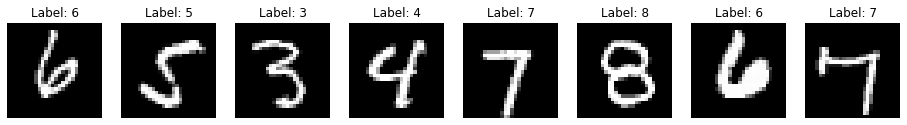

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing

training_data = pd.read_csv('/home/pakhandi101/Downloads/digit-recognizer/train.csv')
x_train = training_data.iloc[:, 1:].values
y_train = training_data.iloc[:, 0].values
# x_train = x_train.astype('float32') / 255
# y_train = y_train.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
fig, axes = plt.subplots(1, 8, figsize=(16, 2))
for i, ax in enumerate(axes):
   
    ax.imshow((x_train[i]).reshape(28, 28), cmap='gray')
    ax.axis('off')
   
    ax.set_title(f'Label: {int(y_train[i])}')

plt.show()

In [5]:
# Reshape the images from 784 to 28x28 and add a channel dimension for grayscale
x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
data_augmentation = preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use the data augmentation generator in the fit method
model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=64),
    epochs=100,
    validation_data=(x_test, y_test)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

/home/pakhandi101/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


/home/pakhandi101/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.6504 - loss: 1.2022 - val_accuracy: 0.9785 - val_loss: 0.0720
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9178 - loss: 0.2600 - val_accuracy: 0.9839 - val_loss: 0.0515
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9404 - loss: 0.1897 - val_accuracy: 0.9863 - val_loss: 0.0445
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9512 - loss: 0.1621 - val_accuracy: 0.9894 - val_loss: 0.0365
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9562 - loss: 0.1398 - val_accuracy: 0.9911 - val_loss: 0.0300
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.9624 - loss: 0.1222 - val_accuracy: 0.9920 - val_loss: 0.0263
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.9655 - loss: 0.1090 - val_accuracy: 0.9910 - val_loss: 0.0287
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.9666 - loss: 0.1072 - val_